<a href="https://colab.research.google.com/github/matheus123deimos/Applied_Electromagnetics/blob/main/notebooks/waveguide_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Problem (9.10)

---

*Computer Experiment: WR-159 Waveguide*. Reproduce the two graphs of Fig. 9.8.2

$$$$

**Obs:** $\alpha_{c} = \displaystyle\frac{R_{s}}{\eta b}\frac{\Big(1 + \displaystyle\frac{2b}{a}\frac{\omega_{c}^{2}}{\omega^{2}}\Big)}{\sqrt{1-\displaystyle\frac{\omega_{c}^{2}}{\omega^{2}}}}, \qquad P_{T} = \frac{1}{4\eta}|E_{0}|^{2}ab\sqrt{1-\frac{\omega_{c}^{2}}{\omega}}$

<ipython-input-42-fd36b160c8a3>:15: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_fr = lambda fr: ((1/b) * np.sqrt((fr*epsilon) / (2*sigma))) * ((1 + ((2*b)/a) * (fr_c/fr)**2) / (np.sqrt(1 - (fr_c/fr)**2)))
<ipython-input-42-fd36b160c8a3>:15: RuntimeWarning: invalid value encountered in sqrt
  alpha_fr = lambda fr: ((1/b) * np.sqrt((fr*epsilon) / (2*sigma))) * ((1 + ((2*b)/a) * (fr_c/fr)**2) / (np.sqrt(1 - (fr_c/fr)**2)))
<ipython-input-42-fd36b160c8a3>:16: RuntimeWarning: divide by zero encountered in double_scalars
  Pt_fr = lambda fr: (1/(4*eta)) * (E0**2) * a*b * np.sqrt(1 - (fr_c/fr)**2)
<ipython-input-42-fd36b160c8a3>:16: RuntimeWarning: invalid value encountered in sqrt
  Pt_fr = lambda fr: (1/(4*eta)) * (E0**2) * a*b * np.sqrt(1 - (fr_c/fr)**2)


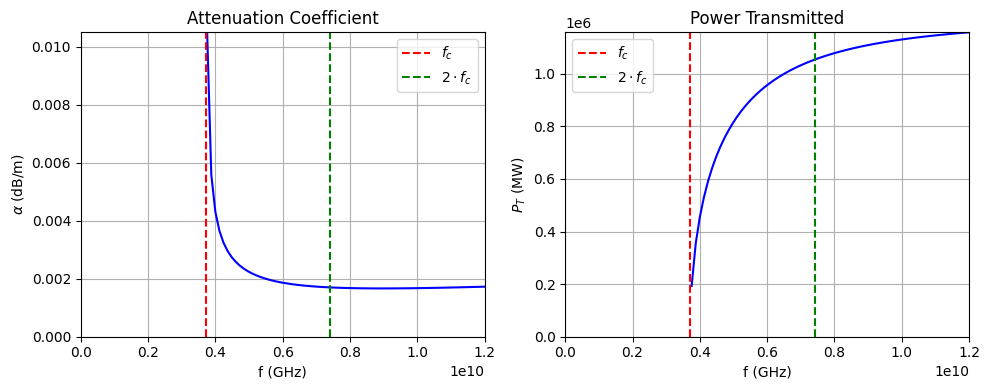

In [42]:
# Parameters
E0 = 1.5 * pow(10, 6)  # V/m
a = 4.0386 * pow(10, -2)  # m
b = 2.0193 * pow(10, -2)  # m
fr_c = 3.71 * pow(10, 9)  # Hz
sigma = 5.8 * pow(10, 7)  # S/m
epsilon = 8.85 * pow(10, -12)  # F/m
eta = 377  # Ohmns
n_size = 100

# Functions
alpha_fr = lambda fr: ((1/b) * np.sqrt((fr*epsilon) / (2*sigma))) * ((1 + ((2*b)/a) * (fr_c/fr)**2) / (np.sqrt(1 - (fr_c/fr)**2)))
Pt_fr = lambda fr: (1/(4*eta)) * (E0**2) * a*b * np.sqrt(1 - (fr_c/fr)**2)

# Data
Fr = np.linspace(0, 12 * pow(10, 9), n_size)
alpha = np.array([alpha_fr(fr) for fr in Fr])
Pt = np.array([Pt_fr(fr) for fr in Fr])

# Subplots Creation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Attenuation Plot
axes[0].plot(Fr, alpha, color='blue')
axes[0].set_title('Attenuation Coefficient')
axes[0].set_xlabel('f (GHz)')
axes[0].set_ylabel(r'$\alpha$ (dB/m)')
axes[0].grid(True)
axes[0].set_xlim(0, 12 * pow(10, 9))
axes[0].set_ylim(0, 0.0105)

#  Fr[i] = fr_c
axes[0].axvline(x=fr_c, linestyle='--', color='red', label=r'$f_{c}$')

#  Fr[i] = 2*fr_c
axes[0].axvline(x=2*fr_c, linestyle='--', color='green', label=r'$2 \cdot f_{c}$')

# Legends
axes[0].legend()

# Power Plot
axes[1].plot(Fr, Pt, color='blue')
axes[1].set_title('Power Transmitted')
axes[1].set_xlabel('f (GHz)')
axes[1].set_ylabel(r'$P_{T}$ (MW)')
axes[1].grid(True)
axes[1].set_xlim(0, 12 * pow(10, 9))
axes[1].set_ylim(0, 1157170)

# Fr[i] = fr_c
axes[1].axvline(x=fr_c, linestyle='--', color='red', label=r'$f_{c}$')

# Fr[i] = 2*fr_c
axes[1].axvline(x=2*fr_c, linestyle='--', color='green', label=r'$2 \cdot f_{c}$')

# Legends
axes[1].legend()

plt.tight_layout()

plt.savefig('9.10.png')

plt.show()



## Problem (9.12)

---

*Computer Experiment: Dielectric Slab Waveguide*. Using the MATLAB functions dslab and dguide, write a program that reproduces all the results and graphs of Examples 9.11.1 and 9.11.2.

$$$$

\begin{equation*}
        \left\{\begin{matrix}
          & v = u * tan(u-R_{m}) \\ \\
          &  v^{2} + u^{2} = R^{2}
        \end{matrix}\right.
\end{equation*}
    
$$$$

If the **m** is even:
$$$$
  \begin{equation*}
    E_{y}(\chi)/E_{1} = \left\{\begin{matrix}
      & cos(k_{c})*\chi & se \quad -a\le \chi\le a\\ \\
      & cos(k_{c})*a*e^{-\alpha_{c}(\chi-a)} & se \quad \chi\ge a \\ \\
      & cos(k_{c})*a*e^{\alpha_{c}(\chi+a)} & se \quad \chi\le -a
    \end{matrix}\right.
  \end{equation*}

$$$$

Id the **m** is odd:
$$$$
  \begin{equation*}
      E_{y}(\chi)/E_{1} = \left\{\begin{matrix}
      & cos(k_{c})*\chi & se \quad -a\le \chi\le a\\\ \\
      & sin(k_{c})*a*e^{-\alpha_{c}(\chi-a)} & se \quad \chi\ge a\\ \\
      & -sin(k_{c})*a*e^{\alpha_{c}(\chi+a)} & se \quad \chi\le -a
    \end{matrix}\right.
  \end{equation*}


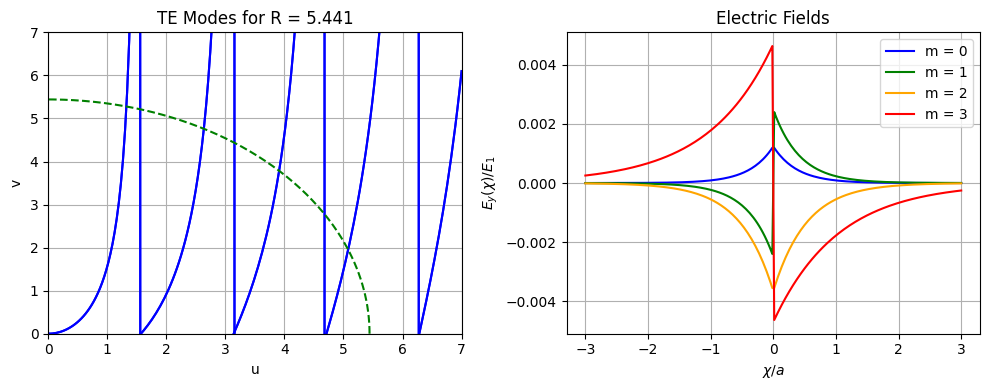

In [84]:
# Parameters
n2 = 1.0
n1 = 2.0
f = 30 * pow(10,9)  # Hz
a = 0.5*pow(10,-2)  # m
Na = np.sqrt(pow(n1,2) - pow(n2,2))
R = (2*np.pi*f*a*Na)/(3*pow(10,8))
M = math.floor((2*R)/np.pi)
n_size = 200

# Functions to First Graph
v = lambda u, m: u*np.tan(u-((m*np.pi)/2))

# Functions to Second Graph
V = lambda m: (1/np.sqrt(math.log(1.25)))*((((np.pi/4)+((m*np.pi)/2))/(np.cos(np.pi/4))) - ((m*np.pi)/2))
u1 = lambda m: ((np.sqrt(1+2*R*(R-((m*np.pi)/2)))-1)/R)
u2 = lambda m: (np.pi/2)*((R-m)/(R+1))
w1 = lambda m: np.exp(-pow((R-((m*np.pi)/2)),2)/pow(V(m),2))
w2 = lambda m: 1-w1(m)
u_start = lambda m: ((m*np.pi)/2) + w1(m)*u1(m) + w2(m)*u2(m)
F = lambda u,m : u*np.tan(u-((m*np.pi)/2)) - np.sqrt(pow(R,2) - pow(u,2))
G = lambda u,v : (v/u) + (u/v) + (pow(R,2)/u)

def dguide(M):

  result = []
  for m in range(M+1):

    u = u_start(m)
    v = np.sqrt(pow(R,2) - pow(u,2))
    kc = (u/a)/100
    alphac = (v/a)/100
    result.append((m,u,v,kc,alphac))

  return result

def ey_over_e1(chi,kc,alphac,m):

  if(m%2==0):

    if(-a<=chi<=a):

      return np.cos(kc)*chi

    elif(chi>a):

      return np.cos(kc)*a*np.exp(-alphac*(chi-a))

    elif(chi<-a):

      return np.cos(kc)*a*np.exp(alphac*(chi+a))

  else:

    if(-a<=chi<=a):

      return np.sin(kc)*chi

    elif(chi>a):

      return np.sin(kc)*a*np.exp(-alphac*(chi-a))

    elif(chi<-a):

      return -np.sin(kc)*a*np.exp(alphac*(chi+a))


# Data
dguide_m = dguide(M)
U = np.linspace(0, 7, n_size)
Chi_over_A = np.linspace((-1.5/a)/100,(1.5/a)/100,n_size)
Vm = [np.array([v(u, m) for u in U]) for m in range(M+1)]
Ey_over_E1 = [np.array([ey_over_e1(coa*a*100,dm[1],dm[2],dm[0]) for coa in Chi_over_A])  for dm in dguide_m]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# TE Modes for R plot
for vm in Vm:
  axes[0].plot(U, vm, color='blue')

theta = np.linspace(0, np.pi/2, n_size)
x_circle = R * np.cos(theta)
y_circle = R * np.sin(theta)
axes[0].plot(x_circle, y_circle, color='green', linestyle='dashed')

axes[0].set_title('TE Modes for R = '+str(round(R,3)))
axes[0].set_xlabel('u')
axes[0].set_ylabel('v')
axes[0].grid(True)
axes[0].set_xlim(0, 7)
axes[0].set_ylim(0, 7)


# Electric Fields
Colors = ['blue','green','orange','red']
for i in range(len(Ey_over_E1)):
  axes[1].plot(Chi_over_A , Ey_over_E1[i], label = "m = "+str(dguide_m[i][0]), color=Colors[i])

axes[1].set_title('Electric Fields')
axes[1].set_ylabel(r'$E_{y}(\chi)/E_{1}$')
axes[1].set_xlabel(r'$\chi/a$')
axes[1].grid(True)

axes[1].legend()

plt.tight_layout()

plt.savefig('9.12.png')
plt.show()


## References

1.   S. J. Orfanidis, ”Electromagnetic Waves and Antennas”, 2016 [Online]. Available: [https://www.ece.rutgers.edu/~orfanidi/ewa/](https://www.ece.rutgers.edu/~orfanidi/ewa/).

